## Part 1 



$$ \frac{d[X]}{dt} = 1, \frac{d[Y]}{dt} = 0 $$ 

$$ \frac{d[X]}{dt} = -2[X], \frac{d[Y]}{dt} = 2[X] $$

$$ \frac{d[X]}{dt} = 0.02[X]^2[Y],  \frac{d[Y]}{dt} = -0.02[X]^2[Y] $$

$$ \frac{d[X]}{dt} = -0.04[X], \frac{d[Y]}{dt} = 0 $$

$$ \frac{d[X]}{dt} = 1 -2[X] + 0.02[X]^2[Y] -0.04[X] $$

$$ \frac{d[Y]}{dt} = 2[X] -0.02[X]^2[Y] $$ 

## Part 2

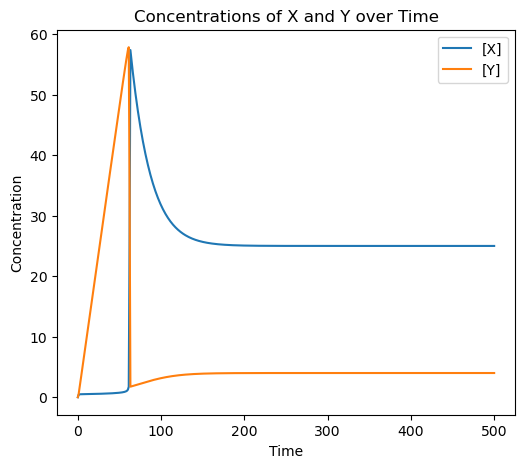

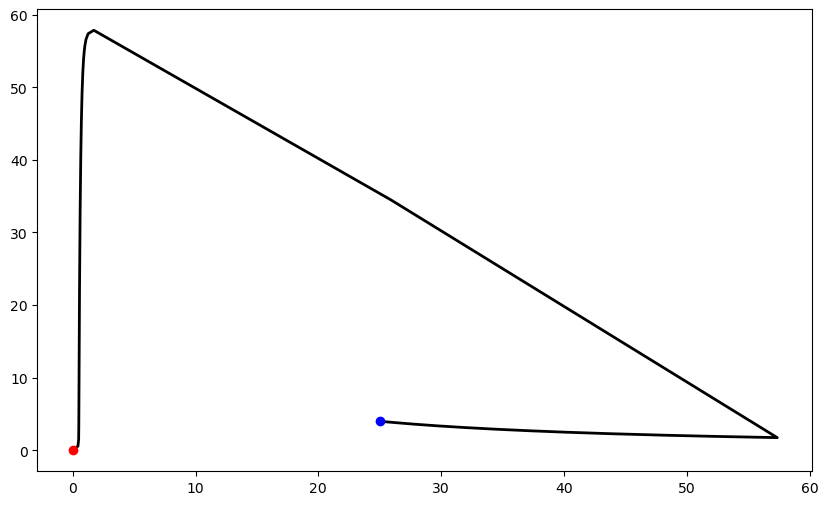

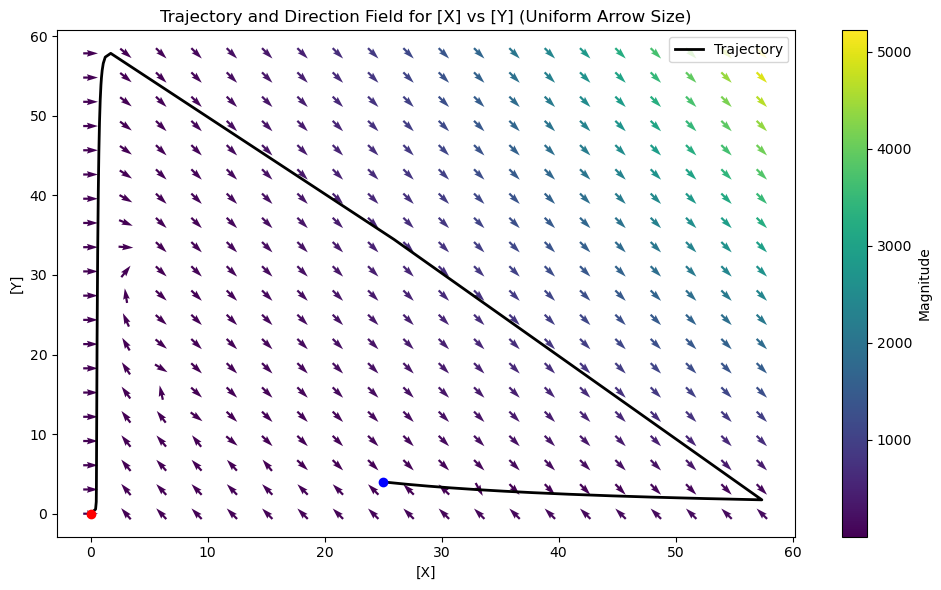

In [48]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

k1 = 1 
k2 = 2
k3 = 0.02
k4 = 0.04

def differential_equations(concentrations, t):
    X, Y = concentrations
    dxdt = k1 - k2*X + k3*(X**2)*Y - k4*X
    dydt = k2*X - k3*(X**2)*Y
    return dxdt, dydt

initial_values = [0,0]

time_points = np.linspace(0,500,500)

solve = odeint(differential_equations, initial_values, time_points)

X, Y = solve.T

plt.figure(figsize=(13, 5))

# Y and Y against time
plt.subplot(1, 2, 1)
plt.plot(time_points, X, label='[X]')
plt.plot(time_points, Y, label='[Y]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentrations of X and Y over Time')
plt.legend()


# Define a grid for direction field
X_grid, Y_grid = np.meshgrid(np.linspace(0, max(X), 20), np.linspace(0, max(Y), 20))
dXdt_grid, dYdt_grid = differential_equations([X_grid, Y_grid], time_points[0])

# Calculate the magnitude for each vector
speed = np.sqrt(dXdt_grid**2 + dYdt_grid**2)

# Normalize the vector components to get unit vectors
dXdt_unit = dXdt_grid / speed
dYdt_unit = dYdt_grid / speed

# Plot the trajectory and the direction field on the same plot
plt.figure(figsize=(10, 6))

# Plot trajectory
plt.plot(X, Y, label='Trajectory', color='black', linewidth=2)
plt.scatter(X[0], Y[0], color='red', zorder=5)  # Mark starting point
plt.scatter(X[-1], Y[-1], color='blue', zorder=5)  # Mark ending point
plt.show()

# Normalize the vector components to get unit vectors
dXdt_unit = dXdt_grid / speed
dYdt_unit = dYdt_grid / speed

# Plot the trajectory and the direction field on the same plot
plt.figure(figsize=(10, 6))

# Plot trajectory
plt.plot(X, Y, label='Trajectory', color='black', linewidth=2)
plt.scatter(X[0], Y[0], color='red', zorder=5)  # Mark starting point
plt.scatter(X[-1], Y[-1], color='blue', zorder=5)  # Mark ending point

# Plot direction field with color, using unit vectors for direction and speed for color
plt.quiver(X_grid, Y_grid, dXdt_unit, dYdt_unit, speed, pivot='mid', cmap=viridis, scale=50)

plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Trajectory and Direction Field for [X] vs [Y] (Uniform Arrow Size)')
plt.colorbar(label='Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

## Plot direction field with color, using unit vectors for direction and speed for color
#plt.quiver(X_grid, Y_grid, dXdt_unit, dYdt_unit, speed, pivot='mid', cmap=viridis, scale=50)
#
#plt.xlabel('[X]')
#plt.ylabel('[Y]')
#plt.title('Trajectory and Direction Field for [X] vs [Y] (Uniform Arrow Size)')
#plt.colorbar(label='Magnitude')
#plt.legend()
#
#plt.tight_layout()
#plt.show()




The system intitially experiences a rapid increase in the concentration of both or one chemical to about 60 units of concentration. 

## Part 3


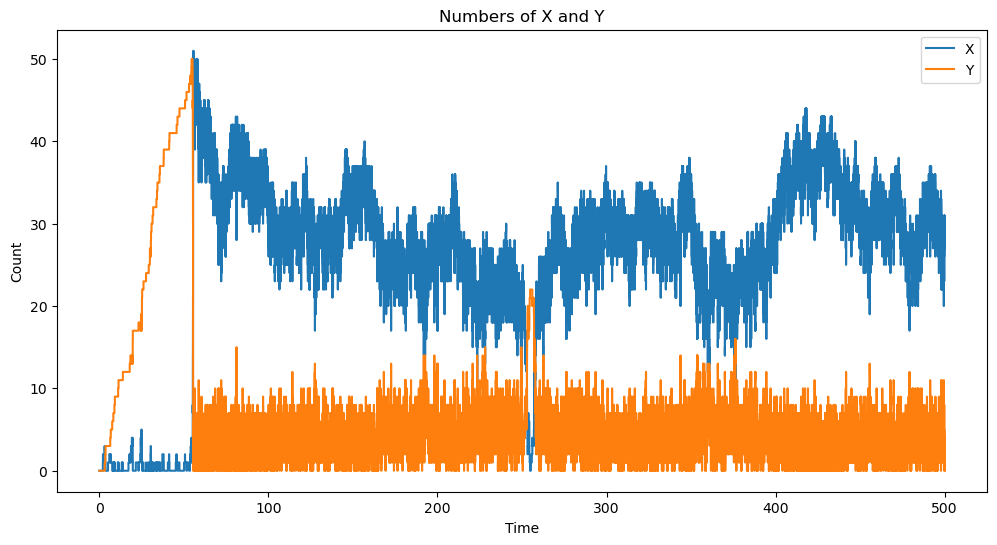

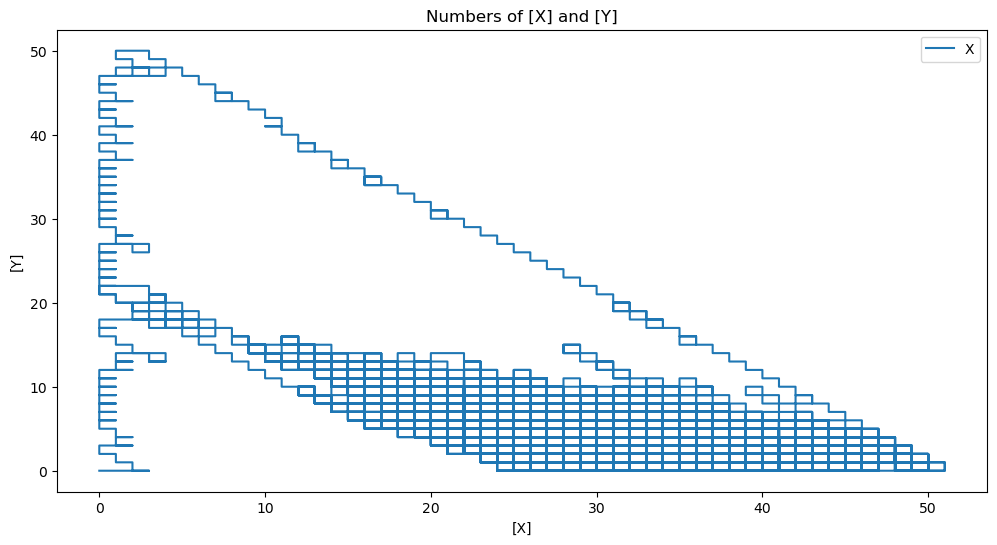

In [54]:
# Optimized Gillespie simulation for the given chemical reactions
import random

r1 = (1,0)
r2 = (-1,1)
r3 = (1,-1)
r4 = (-1,0)

R = [r1,r2,r3,r4]

def gillespie(X, Y, k1, k2, k3, k4, max_time):
    # Initialize time and lists for molecule counts and time
    time = 0
    times = [time]
    X_counts = [X]
    Y_counts = [Y]
    
    # Run simulation
    while time < max_time:
        # Calculate propensities
        a1 = k1  # Ø → X
        a2 = k2 * X  # X → Y
        a3 = k3 * Y * X * (X - 1) #* Y / 2 #if X > 1 else 0  # 2X + Y → 3X
        a4 = k4 * X  # X → Ø
        a_total = a1 + a2 + a3 + a4
        A = [a1/a_total, a2/a_total, a3/a_total, a4/a_total]
        
        # Break if no more reactions can occur
        if a_total == 0:
            break
        
        # Time to next reaction
        tau = -np.log(1 - np.random.rand()) / a_total
        time += tau
        
        rnd = np.random.choice(len(A),p=A)

        #r_j = random.randint(0,3)
        X += R[rnd][0]
        Y += R[rnd][1]

        # Randomly choose reaction to occur
        #rand = np.random.rand() * a_total
        #if rand < a1:
        #    X += 1  # Ø → X
        #elif rand < a1 + a2:
        #    X -= 1  # X → Y
        #    Y += 1
        #elif rand < a1 + a2 + a3:
        #    X += 1  # 2X + Y → 3X
        #else:
        #    X -= 1  # X → Ø
        
        # Update lists
        times.append(time)
        X_counts.append(X)
        Y_counts.append(Y)
    
    return times, X_counts, Y_counts




# Perform simulation
times, X_counts, Y_counts = gillespie(X=0, Y=0, k1=1, k2=2, k3=0.02, k4=0.04, max_time=500)

# Plot the results
plt.figure(figsize=(12, 6))
plt.step(times, X_counts, where='post', label='X')
plt.step(times, Y_counts, where='post', label='Y')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Numbers of X and Y')
plt.legend()
plt.show()


# Plot the results
plt.figure(figsize=(12, 6))
plt.step(X_counts, Y_counts, where='post', label='X')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Numbers of [X] and [Y]')
plt.legend()
plt.show()

